# Heatmaps for SILAC and GOs

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import pylab
import scipy.cluster.hierarchy as sch

from pylab import *

### 1.5 FC SILAC ZFP982 OE

In [2]:
#import pandas as pd
df_Prot15 = pd.read_table('SILAC_results_for_ZFP982_1.5FC.txt')#, index_col=0)#, row_labels=0)
df_GenesGO = pd.read_table('SILAC_results_for_ZFP982_Genes_in_Term.txt')#, index_col=0)#, row_labels=0)

#column_labels = actregs.index #actregs.axes[0]
#row_labels = actregs.columns #actregs.axes[1]
#data = actregs.values

print(df_Prot15.head(3))
print(df_GenesGO.head(3))

  Protein      FC        P value
0   Vldlr  14.960  5.090000e-295
1  ZFP982  10.500  1.290000e-288
2    Rpsa   7.477  1.800000e-267
  Cytoplasm Nucleus TEAD-2-YAP_complex Embryo Embryonic_cell_line
0     Rpl13    Ern1               Yap1  Tubb5                Akt1
1      Ern1   Tubb5              Tead2   Akt1              Ctnnb1
2     Tubb5    Akt1                NaN   Calr            Hsp90ab1


In [3]:
 df_GenesGO.head(3)

,Cytoplasm,Nucleus,TEAD-2-YAP_complex,Embryo,Embryonic_cell_line
0,Rpl13,Ern1,Yap1,Tubb5,Akt1
1,Ern1,Tubb5,Tead2,Akt1,Ctnnb1
2,Tubb5,Akt1,NaN,Calr,Hsp90ab1


### Slice columns

In [4]:
df_Cytoplasm = df_GenesGO.loc[:,['Cytoplasm']]
df_Cytoplasm.head(3)

,Cytoplasm
0,Rpl13
1,Ern1
2,Tubb5


In [5]:
df_Nucleus = df_GenesGO.loc[:,['Nucleus']]
df_Nucleus.head(3)

,Nucleus
0,Ern1
1,Tubb5
2,Akt1


In [6]:
df_YAPcomp = df_GenesGO.loc[:,['TEAD-2-YAP_complex']]
df_YAPcomp.head(3)

,TEAD-2-YAP_complex
0,Yap1
1,Tead2
2,NaN


In [7]:
df_Embryo = df_GenesGO.loc[:,['Embryo']]
df_Embryo.head(3)

,Embryo
0,Tubb5
1,Akt1
2,Calr


In [8]:
df_EmbEmbryonic_cell_line = df_GenesGO.loc[:,['Embryonic_cell_line']]
df_EmbEmbryonic_cell_line.head(3)

,Embryonic_cell_line
0,Akt1
1,Ctnnb1
2,Hsp90ab1


# Intersect tables

## test 

In [9]:
#intersection test 
#pd.Series(np.intersect1d(pd.Series([1,2,3,5,42]), pd.Series([4,5,6,20,42])))

In [10]:
import pandas as pd
  
# Creating Data frames
df1 = {'A': [1, 2, 3, 4],
         'B': ['abc', 'def', 'efg', 'ghi']} 
df2 = {'A': [1, 2, 3, 4, 5 ],
         'B': ['Geeks', 'For', 'efg', 'ghi', 'some'],
         'C':['Nikhil', 'Rishabh', 'Rahul', 'Shubham', 'Hanna']} 
           
d1 = pd.DataFrame(df1)
d2 = pd.DataFrame(df2) 

print(d1)
print(d2)

   A    B
0  1  abc
1  2  def
2  3  efg
3  4  ghi
   A      B        C
0  1  Geeks   Nikhil
1  2    For  Rishabh
2  3    efg    Rahul
3  4    ghi  Shubham
4  5   some    Hanna


In [11]:
d2.index

RangeIndex(start=0, stop=5, step=1)

In [12]:
# Calling merge() function
int_df = pd.merge(d1, d2, how ='inner', on =['A', 'B'])
print(int_df)

   A    B        C
0  3  efg    Rahul
1  4  ghi  Shubham


In [13]:
print(len(df_Prot15), 
      len(df_Cytoplasm))

161 119


In [14]:
df_ndup_Prot15 = df_Prot15.drop_duplicates(subset='Protein')
df_ndup_Cytoplasm = df_Cytoplasm.drop_duplicates(subset='Cytoplasm')

print(len(df_ndup_Prot15),
      len(df_ndup_Cytoplasm))

161 119


In [15]:
df_Cytoplasm.values[:5,:1]

array([['Rpl13'],
       ['Ern1'],
       ['Tubb5'],
       ['Akt1'],
       ['Ndufa11']], dtype=object)

## ZFP982 1.5 FC GO intersection

In [16]:
df_Cytoplasm.rename(columns = {'Cytoplasm':'Protein'}, inplace = True)
df_Cytoplasm.head(3)

,Protein
0,Rpl13
1,Ern1
2,Tubb5


In [17]:
int_df_Cytoplasm = pd.merge(df_Prot15, df_Cytoplasm, how ='inner', on =['Protein'])
print(int_df_Cytoplasm)

      Protein     FC        P value
0        Rpsa  7.477  1.800000e-267
1       Prdx6  7.121  2.210000e-267
2      Chchd2  7.064  3.920000e-257
3        Btf3  6.174  3.530000e-240
4    Hsp90ab1  5.409  1.270000e-188
..        ...    ...            ...
100    Eif4a3  1.500   8.840000e-17
101   Hnrnpab  1.586   9.460000e-17
102     Hspa9  1.558   1.100000e-16
103    Prkcsh  1.555   1.240000e-16
104     Erp29  1.517   1.580000e-16

[105 rows x 3 columns]


In [18]:
df_Nucleus.rename(columns = {'Nucleus':'Protein'}, inplace = True)

int_df_Nucleus = pd.merge(df_Prot15, df_Nucleus, how ='inner', on =['Protein'])
print(int_df_Nucleus)

   Protein     FC        P value
0     Rpsa  7.477  1.800000e-267
1     Btf3  6.174  3.530000e-240
2   Serbp1  5.779  4.580000e-238
3    Sumo3  5.534  2.280000e-211
4    Sumo2  5.473  1.820000e-203
..     ...    ...            ...
68   Hspb1  1.541   2.300000e-20
69   Hmgn1  1.510   1.330000e-19
70     Ncl  1.562   3.410000e-19
71   Srsf7  1.503   7.210000e-17
72  Eif4a3  1.500   8.840000e-17

[73 rows x 3 columns]


## export to excel sheet

In [35]:
int_df_Cytoplasm.set_index('Protein').to_excel('int_df_Cytoplasm.xlsx', sheet_name='int_df_Cytoplasm')

In [36]:
int_df_Nucleus.set_index('Protein').to_excel('int_df_Nucleus.xlsx', sheet_name='int_df_Nucleus')

GO analyse performed by ShinyGO v0.75: http://bioinformatics.sdstate.edu/go/

Cite:
 Ge SX, Jung D & Yao R, Bioinformatics 2020 
 https://doi.org/10.1093/bioinformatics/btz931

In [20]:
#sort_actregs_R = actregs.sort_values(by=['RatioKClvsControl'], ascending=[False], inplace=True)
#sort_actregs_R.head(1)

# Heatmap Plotting

In [21]:
df_Prot15.index

RangeIndex(start=0, stop=161, step=1)

In [22]:
df_Prot15.set_index('Protein')

,FC,P value
Protein,,
Vldlr,14.960,5.090000e-295
ZFP982,10.500,1.290000e-288
Rpsa,7.477,1.800000e-267
Prdx6,7.121,2.210000e-267
Chchd2,7.064,3.920000e-257
...,...,...
Eif4a3,1.500,8.840000e-17
Hnrnpab,1.586,9.460000e-17
Hspa9,1.558,1.100000e-16


In [23]:
df_Prot15.set_index('Protein').columns[:]

Index(['FC', 'P value'], dtype='object')

In [24]:
df_Prot15.set_index('Protein').values[:3,:]

array([[1.496e+001, 5.090e-295],
       [1.050e+001, 1.290e-288],
       [7.477e+000, 1.800e-267]])

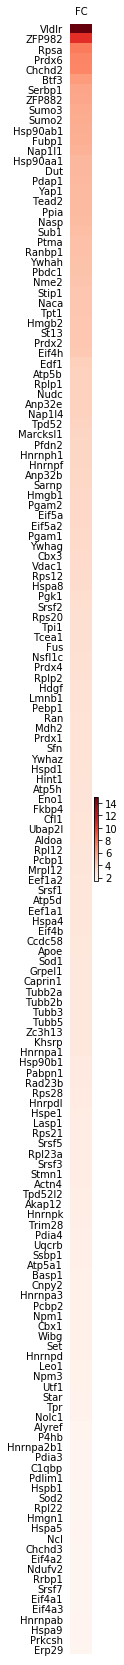

In [25]:
df_indexed = df_Prot15.set_index('Protein')

column_labels = df_indexed.index #CGNP.axes[0]
row_labels = df_indexed.columns[:1] #CGNP.axes[1]
data = df_indexed.values[:,:1]

# figure size
#plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(0.5, 30))

# color scheme
heatmap = ax.pcolormesh(data, cmap='Reds', alpha=1) # plt.cm.bwr
    
# add colorbar
fig.colorbar(heatmap, ax=ax)#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
#plt.xticks(rotation=90)

#no frame
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

plt.show()
#fig.savefig("RIC-Heatmap.jpg", dpi=300)
fig.savefig("Prot15-Heatmap.svg", dpi=300)
#fig.savefig("RIC-Heatmap.pdf", dpi=300)

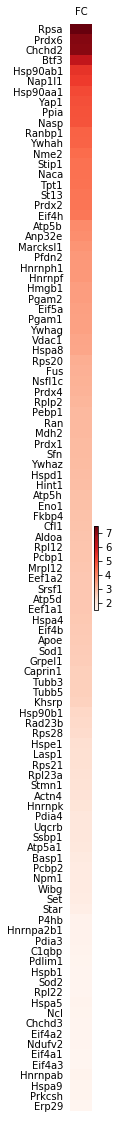

In [26]:
df_indexed = int_df_Cytoplasm.set_index('Protein')

column_labels = df_indexed.index #CGNP.axes[0]
row_labels = df_indexed.columns[:1] #CGNP.axes[1]
data = df_indexed.values[:,:1]

# figure size
#plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(0.5, 20))

# color scheme
heatmap = ax.pcolormesh(data, cmap='Reds', alpha=1) # plt.cm.bwr
    
# add colorbar
fig.colorbar(heatmap, ax=ax)#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
#plt.xticks(rotation=90)

#no frame
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

plt.show()
#fig.savefig("RIC-Heatmap.jpg", dpi=300)
fig.savefig("Cytoplasm-Heatmap.svg", dpi=300)
#fig.savefig("RIC-Heatmap.pdf", dpi=300)

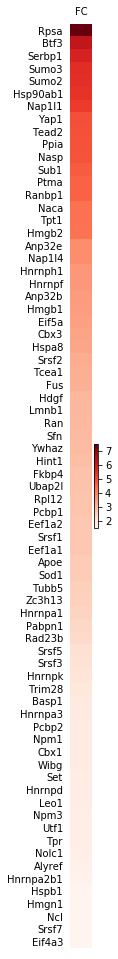

In [27]:
df_indexed = int_df_Nucleus.set_index('Protein')

column_labels = df_indexed.index #CGNP.axes[0]
row_labels = df_indexed.columns[:1] #CGNP.axes[1]
data = df_indexed.values[:,:1]

# figure size
#plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(0.5, 17))

# color scheme
heatmap = ax.pcolormesh(data, cmap='Reds', alpha=1) # plt.cm.bwr
    
# add colorbar
fig.colorbar(heatmap, ax=ax)#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
#plt.xticks(rotation=90)

#no frame
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

plt.show()
#fig.savefig("RIC-Heatmap.jpg", dpi=300)
fig.savefig("Nucleus-Heatmap.svg", dpi=300)
#fig.savefig("RIC-Heatmap.pdf", dpi=300)

# bioinfokit

In [37]:
#conda install -c bioconda bioinfokit

from bioinfokit import analys, visuz
# load dataset as pandas dataframe
df = analys.get_data('hmap').data
df.head(2)
    Gene         A         B         C        D        E         F
0  B-CHI  4.505700  3.260360 -1.249400  8.89807  8.05955 -0.842803
1   CTL2  3.508560  1.660790 -1.856680 -2.57336 -1.37370  1.196000

# set gene names as index
df = df.set_index(df.columns[0])
df.head(2)
              A         B         C        D        E         F
Gene
B-CHI  4.505700  3.260360 -1.249400  8.89807  8.05955 -0.842803
CTL2   3.508560  1.660790 -1.856680 -2.57336 -1.37370  1.196000


# heatmap with hierarchical clustering 
visuz.gene_exp.hmap(df=df, dim=(3, 6), tickfont=(6, 4))

# heatmap without hierarchical clustering 
visuz.gene_exp.hmap(df=df, rowclus=False, colclus=False, dim=(3, 6), tickfont=(6, 4))
# heatmaps will be saved in same directory
# set parameter show=True, if you want view the image instead of saving

IndentationError: unexpected indent (<ipython-input-37-e133bc8e1fa7>, line 7)

In [ ]:
# colormaps are available at  https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# default is seismic 
# here I use red-yellow-green: RdYlGn
visuz.gene_exp.hmap(df=df, cmap='RdYlGn', dim=(3, 6), tickfont=(6, 4))

# heatmap without hierarchical clustering 
visuz.gene_exp.hmap(df=df, rowclus=False, colclus=False, cmap='RdYlGn', dim=(3, 6), tickfont=(6, 4))

In [ ]:
# Z-score can be used to standardize value with mean 0 and var 1
# default Z-score is set to None and it applies to only heatmap with cluster
# here I standardize column with Z-score
visuz.gene_exp.hmap(df=df, zscore=1, dim=(3, 6), tickfont=(6, 4))

# here I standardize row with Z-score
visuz.gene_exp.hmap(df=df, zscore=0, dim=(3, 6), tickfont=(6, 4))
